CCPS 844 Data Mining (Lab 8)
Submit your solution as a pdf file

- Q-1 Select a dataset/datasets of your choice. 
Apply/Fit MLP Classification
Evaluate the results

- Q-2 Select a multi-label dataset/datasets of your choice. 
Apply/Fit MLP Classification
Call the predict function to get a multi label value for your test data

In [89]:
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 100)

In [91]:
from sklearn.neural_network import MLPClassifier

In [92]:
df = pd.read_csv('winequality-red.csv')
#df['overfive'] = (df.quality > 5).astype(int)

In [93]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
714,9.9,0.740,0.28,2.6,0.078,21.0,77.0,0.99800,3.28,0.51,9.8,5
304,8.4,0.650,0.60,2.1,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
376,11.5,0.450,0.50,3.0,0.078,19.0,47.0,1.00030,3.26,1.11,11.0,6
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5


In [94]:
df = df.drop(['sulphates','chlorides','residual sugar','free sulfur dioxide','volatile acidity','density','total sulfur dioxide','alcohol','fixed acidity'], axis=1).sample(frac=.66)

In [95]:
df.sample(5)

,citric acid,pH,quality
455,0.67,3.22,8
1472,0.60,3.38,6
304,0.60,3.20,5
840,0.47,3.24,7
1317,0.46,3.18,6


In [96]:
from sklearn import tree
#from sklearn.preprocessing import Normalizer

In [102]:
X = df.iloc[:,:-1]
y = df.quality
X

,citric acid,pH
1361,0.14,3.36
796,0.31,3.10
697,0.02,3.47
1470,0.11,2.88
1140,0.30,3.41
134,0.05,3.22
1154,0.00,3.59
1369,0.00,3.33
456,0.39,3.37
810,0.10,3.30


In [103]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [104]:
y.unique()

array([5, 6, 4, 7, 8, 3], dtype=int64)

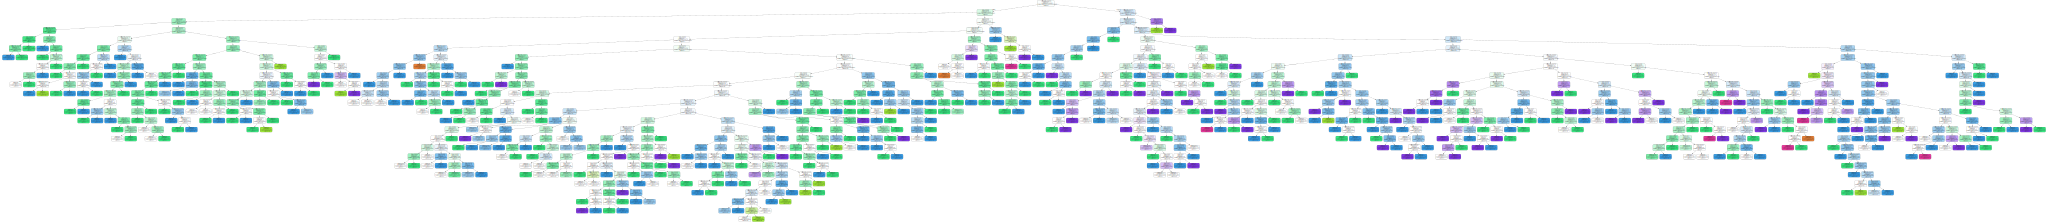

In [105]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=str(y.unique()),  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)  

graph.render("TEST") 
graph